# Plot LabChart Recordings

This notebook will help you explore and plot any exported .mat file from LabChart. To run this, you will need to upload an exported .mat file from LabChart into your DataHub. You can either export a selection of data (Option 1 below) or an entire experiment file (Option 2 below). In either case, **you should only be exporting your recorded channel.**

>**Task**: Run the cell below to get started.

In [1]:
# Set up interactive matplot lib and define a function to interact with plots
%matplotlib nbagg

def onclick(event):
    pos.append([event.xdata,event.ydata])

# Import our packages
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import loadmat

print('Packages imported.')

Packages imported.


>Task: Change the filename below to your file.

In [6]:
filename = 'string_data_full.mat'

data = loadmat(filename)['data'][0]
dataend = loadmat(filename)['dataend']
datastart = loadmat(filename)['datastart']

# Get the sampling rate and can create a time axis for our data
sampling_rate = 40000
timestamps = (np.arange(0, len(data)) * (1.0 / sampling_rate))*1000

print('Data imported.')

Data imported.


## Analyzing a selection of data
Use the code below if you exported a **selection** of data, not a complete file.

#### Using the interactive plot
The x (time, in ms) and y (voltage, in volts) position of your cursor will update in the bottom left corner. You can use these values to make your calculations, if necessary. You can create a box to Zoom into using the Zoom button below, and return to the home view using the Home button. The crosshairs button will allow you to pan through the recording.

<IPython.core.display.Javascript object>


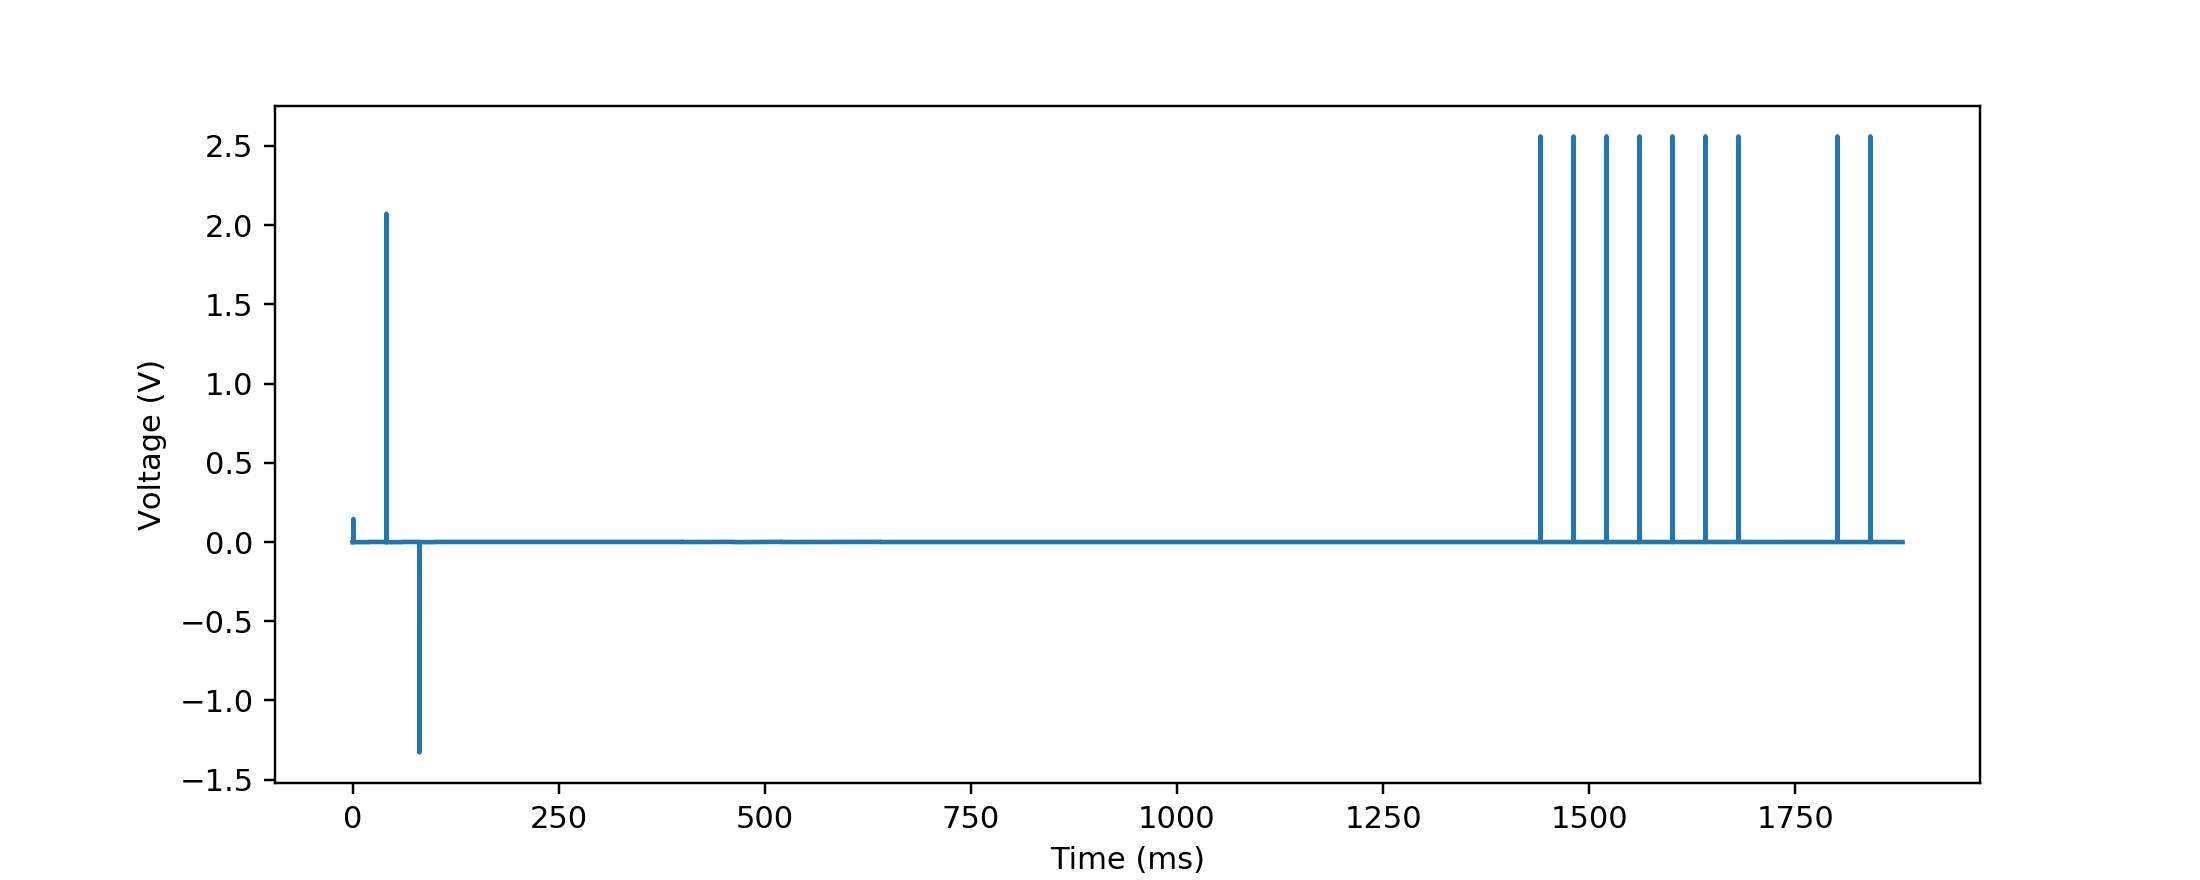

In [7]:
# set up figure & plt
fig,ax = plt.subplots(figsize=(10,4))

plt.plot(timestamps,data)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
#plt.xlim([200,700])
plt.show()

## Analyze "scope view" style trial data
Use this option if you recorded many pages in scope view and exported the entire file as a .mat. You can change the trial # below where it says `this_trial` to flip through different trials of your data.

<IPython.core.display.Javascript object>


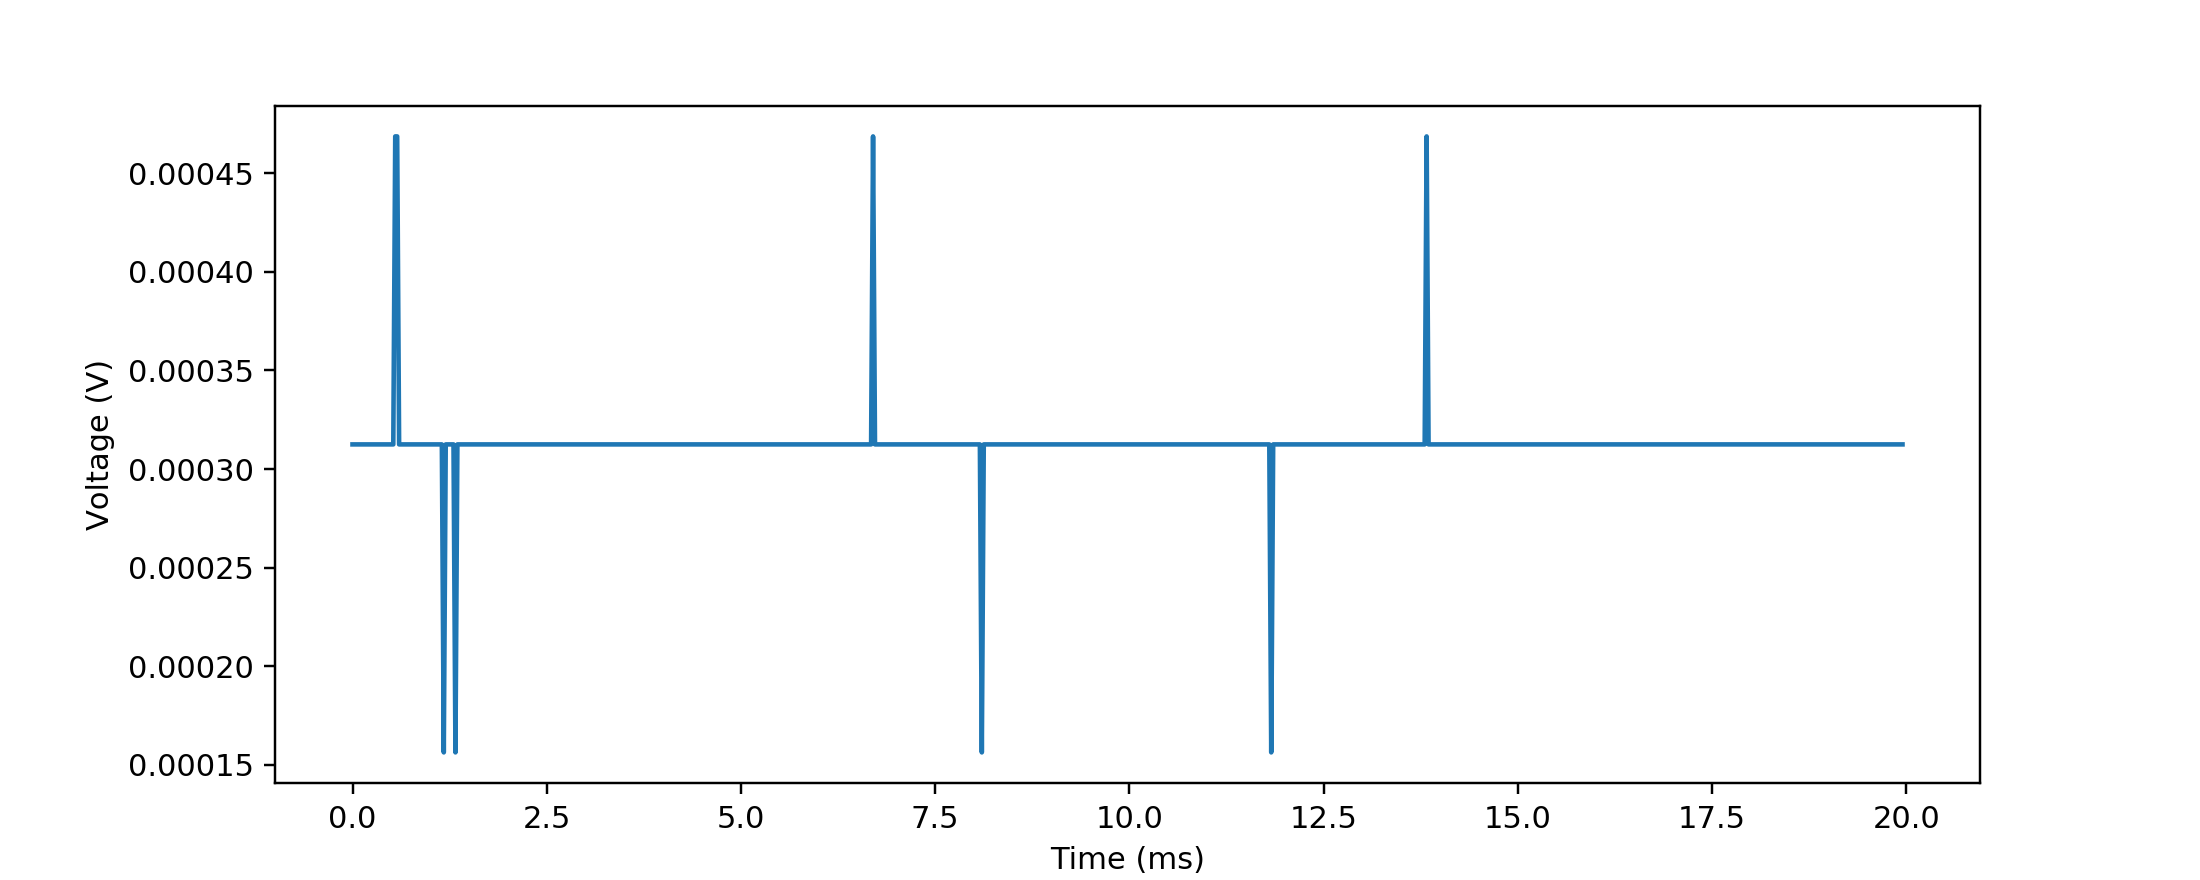

In [14]:
# Change the trial below
this_trial = 20

trial_voltage = data[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps = timestamps[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps -= trial_timestamps[0]

# Set up figure and plot
fig,ax = plt.subplots(figsize=(10,4),sharex=True)
plt.plot(trial_timestamps,trial_voltage)
plt.xlabel('Time (ms)')
#plt.legend(['Response'])
plt.ylabel('Voltage (V)')

# Change the x axis limits
#plt.xlim([0,600])
 
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()